In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
sns.set_style("whitegrid")

In [140]:
Data_0 = {}
for part in ["mu", "tau"]:
    # Load the data
    Data_0[part] = pd.read_csv(f"../raw_data/Track_Output_CC_tauhadron_3cm_{part}_29082024", header=None, sep="\s+").dropna()
    Data_0[part].columns = ["Event", "plane", "id", "Ekin_in", "x", "y", "z", "px", "py", "pz", "Ekin_post"]
    
    # Identify double events
    double_events = Data_0[part].query("plane == 0 & id == 13")[["Event", "id"]].value_counts().reset_index().query("count == 2")["Event"]
    print(double_events.sort_values())
    double_events.sort_values().reset_index().to_csv(f"../data/bad_events_{part}.csv")
    # Filter out double events
    Data_0[part] = Data_0[part][~Data_0[part]["Event"].isin(double_events)]
    
    # Add label for the particle type
    Data_0[part]["label"] = f"nu{part}"

# Data_0


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/var/folders/9y/jxzgvgmd0p97vkzh_m18rqb80000gn/T/ipykernel_32869/2832863130.py:4: SyntaxWarning: invalid escape sequence '\s'
  Data_0[part] = pd.read_csv(f"../raw_data/Track_Output_CC_tauhadron_3cm_{part}_29082024", header=None, sep="\s+").dropna()


69       40
33       72
54      252
48      403
40      705
      ...  
21    11873
68    11938
55    11983
73    12579
18    12755
Name: Event, Length: 78, dtype: int64
31      181
33      188
1       313
76      754
63      835
      ...  
72    17835
68    18193
20    18230
92    18585
87    18589
Name: Event, Length: 97, dtype: int64


In [139]:
double_events.sort_values().reset_index()

,index,Event
0,31,181
1,33,188
2,1,313
3,76,754
4,63,835
...,...,...
92,72,17835
93,68,18193
94,20,18230
95,92,18585


In [131]:
Data = pd.concat([Data_0["mu"], Data_0["tau"]])
Data

,Event,plane,id,Ekin_in,x,y,z,px,py,pz,Ekin_post,label
0,0,0.0,13.0,32.5221,-0.279207,-0.123482,3.0,-0.092088,-0.040400,0.994931,32.377155,numu
1,0,1.0,13.0,32.5221,-0.740796,-0.325284,8.0,-0.091326,-0.040039,0.995016,32.340406,numu
2,0,2.0,13.0,32.5221,-1.197130,-0.526514,13.0,-0.090442,-0.039774,0.995107,32.302007,numu
3,0,3.0,13.0,32.5221,-1.651491,-0.725811,18.0,-0.090690,-0.039150,0.995109,32.260600,numu
4,0,4.0,13.0,32.5221,-2.106177,-0.920485,23.0,-0.090080,-0.038320,0.995197,32.220988,numu
...,...,...,...,...,...,...,...,...,...,...,...,...
2520878,18623,21.0,13.0,21.2590,0.322753,-9.980713,108.0,0.015560,-0.092653,0.995577,15.710330,nutau
2520879,18623,22.0,13.0,21.2590,0.407707,-10.443079,113.0,0.017915,-0.090745,0.995713,15.669332,nutau
2520880,18623,23.0,13.0,21.2590,0.501390,-10.900429,118.0,0.018080,-0.091724,0.995620,15.599570,nutau
2520881,18623,24.0,13.0,21.2590,0.594801,-11.359298,123.0,0.018852,-0.090737,0.995696,15.562219,nutau


In [150]:
Data_0["tau"].query("Event == 3")

,Event,plane,id,Ekin_in,x,y,z,px,py,pz,Ekin_post,label
571,3,0.0,13.0,66.25910,0.029158,0.031062,3.0,0.011519,0.010291,0.999881,37.894413,nutau
572,3,1.0,13.0,66.25910,0.089561,0.082872,8.0,0.012498,0.010146,0.999870,37.848587,nutau
573,3,2.0,13.0,66.25910,0.153632,0.133966,13.0,0.013262,0.010722,0.999855,37.812750,nutau
574,3,3.0,13.0,66.25910,0.222810,0.187260,18.0,0.014660,0.011046,0.999832,37.761406,nutau
575,3,4.0,13.0,66.25910,0.297975,0.241831,23.0,0.015499,0.010686,0.999823,37.706502,nutau
...,...,...,...,...,...,...,...,...,...,...,...,...
665,3,40.0,2212.0,5.44617,-40.455465,9.698900,203.0,-0.610252,0.324158,0.722851,0.429705,nutau
666,3,41.0,2212.0,5.44617,-45.074988,12.345786,208.0,-0.648033,0.403346,0.646038,0.346169,nutau
667,3,42.0,2212.0,5.44617,-50.383445,15.660786,213.0,-0.691226,0.401033,0.601148,0.240613,nutau
668,3,43.0,2212.0,5.44617,-56.339148,19.411948,218.0,-0.669334,0.508474,0.541707,0.060632,nutau


In [154]:
Data_0["tau"].query("Event == 4 & id == 2212")

,Event,plane,id,Ekin_in,x,y,z,px,py,pz,Ekin_post,label
731,4,10.0,2212.0,16.00960,-4.472838,15.630186,53.0,-0.293628,0.913971,0.280070,0.059398,nutau
732,4,4.0,2212.0,16.00960,1.038286,1.053805,23.0,0.286164,-0.116679,0.951050,0.785791,nutau
733,4,5.0,2212.0,16.00960,1.175043,1.523818,28.0,-0.493507,0.429346,0.756381,0.048031,nutau
734,4,5.0,2212.0,16.00960,2.368281,-2.193532,28.0,0.156162,-0.864407,0.477926,0.224772,nutau
736,4,4.0,2212.0,16.00960,0.941973,0.700804,23.0,0.226475,-0.313732,0.922107,0.204437,nutau
737,4,5.0,2212.0,16.00960,2.047657,-0.926743,28.0,0.278931,-0.183518,0.942612,0.097868,nutau
742,4,8.0,2212.0,16.00960,6.094982,-5.729710,43.0,-0.223991,0.305793,0.925375,0.310914,nutau
743,4,9.0,2212.0,16.00960,4.870637,-4.104099,48.0,-0.196229,0.310601,0.930065,0.239122,nutau
744,4,10.0,2212.0,16.00960,3.639386,-2.349976,53.0,-0.205656,0.360986,0.909612,0.145728,nutau
765,4,6.0,2212.0,16.00960,0.858054,1.572968,33.0,0.097065,0.178123,0.979209,0.114739,nutau


In [132]:
Data_0["tau"].query("plane == 0 & id == 13 & Event == 181")

,Event,plane,id,Ekin_in,x,y,z,px,py,pz,Ekin_post,label


In [89]:
Data.query("label == 'nutau' & plane == 0 & id == 13")

,Event,plane,id,Ekin_in,x,y,z,px,py,pz,Ekin_post,label
0,0,0.0,13.0,59.3047,0.039936,0.086519,3.0,0.013060,0.024478,0.999615,37.228574,nutau
204,1,0.0,13.0,34.0972,0.261723,-0.106046,3.0,0.088026,-0.035768,0.995476,7.460256,nutau
435,2,0.0,13.0,78.3003,0.111198,-0.017741,3.0,0.037173,-0.005805,0.999292,39.469454,nutau
571,3,0.0,13.0,66.2591,0.029158,0.031062,3.0,0.011519,0.010291,0.999881,37.894413,nutau
670,4,0.0,13.0,12.5897,-0.249600,-1.020545,3.0,-0.079546,-0.328232,0.941242,3.998085,nutau
...,...,...,...,...,...,...,...,...,...,...,...,...
2520331,18619,0.0,13.0,102.2080,-0.147460,-0.159737,3.0,-0.054751,-0.053738,0.997053,13.761137,nutau
2520486,18620,0.0,13.0,42.7079,0.149186,-0.273034,3.0,0.048820,-0.090638,0.994687,21.446377,nutau
2520636,18621,0.0,13.0,23.5684,0.218674,-0.829818,3.0,0.077026,-0.276285,0.957984,3.499340,nutau
2520780,18622,0.0,13.0,72.9456,-0.017961,0.038184,3.0,-0.009198,0.013885,0.999861,49.294488,nutau


In [123]:
Data.query("label == 'nutau' & plane == 0 & id == 13").iloc[:10000]["Ekin_in"].describe()

count    10000.000000
mean        49.055630
std         29.930493
min          3.264640
25%         24.806850
50%         43.498900
75%         68.321000
max        144.149000
Name: Ekin_in, dtype: float64

In [144]:
Data.query("label == 'nutau' & plane == 0 & id == 13").iloc[:1000][["Event","Ekin_in"]].sum()

Event      502709.00000
Ekin_in     48091.58483
dtype: float64

In [105]:
Data.query("label == 'nutau' & Event == 181 & plane == 0")

,Event,plane,id,Ekin_in,x,y,z,px,py,pz,Ekin_post,label
26032,181,0.0,13.0,47.062600,-0.125136,-0.122150,3.0,-0.042127,-0.040820,0.998278,22.775750,nutau
26082,181,0.0,2212.0,1.741240,-0.741553,0.873345,3.0,-0.243926,0.269258,0.931665,0.762037,nutau
26091,181,0.0,2212.0,2.551670,0.665880,0.108525,3.0,0.211694,0.032055,0.976810,1.578265,nutau
26107,181,0.0,-211.0,0.540276,0.437813,0.414979,3.0,0.139305,0.094947,0.985687,0.359316,nutau
26108,181,0.0,13.0,0.540276,-0.626408,0.315573,3.0,0.045853,0.428965,0.902157,0.003381,nutau
26110,181,0.0,-211.0,2.806470,-0.159452,0.425334,3.0,-0.048456,0.136827,0.989409,2.633517,nutau
26121,181,0.0,211.0,0.353734,-1.886307,-6.360599,3.0,-0.373458,-0.851797,0.367384,0.128835,nutau
26122,181,0.0,-211.0,0.716336,-0.380005,1.059589,3.0,-0.111772,0.337736,0.934581,0.540880,nutau


In [110]:
Data.query("label == 'nutau' & plane == 0 & id == 13")[["Event", "id"]].value_counts().reset_index().query("count == 2")

,Event,id,count
0,8142,13.0,2
1,313,13.0,2
2,1432,13.0,2
3,11427,13.0,2
4,11398,13.0,2
...,...,...,...
92,18585,13.0,2
93,7060,13.0,2
94,9367,13.0,2
95,3526,13.0,2


<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
/var/folders/9y/jxzgvgmd0p97vkzh_m18rqb80000gn/T/ipykernel_32869/1023196905.py:6: SyntaxWarning: invalid escape sequence '\m'
  g.set_axis_labels("$E_{\mu}$", "$E_{\\tau}$")


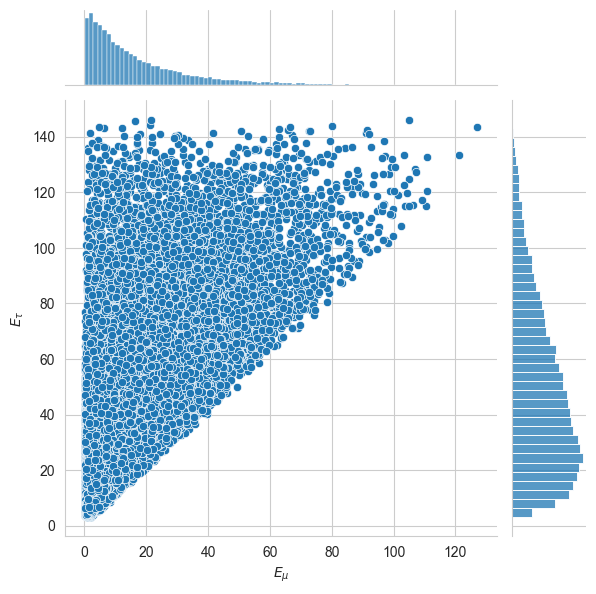

In [113]:
# Example of jointplot with custom axis labels
g = sns.jointplot(data=Data.query("label == 'nutau' & plane == 0 & id == 13"),
                  y="Ekin_in", x="Ekin_post")

# Set custom labels
g.set_axis_labels("$E_{\mu}$", "$E_{\\tau}$")

# Display the plot
plt.show()


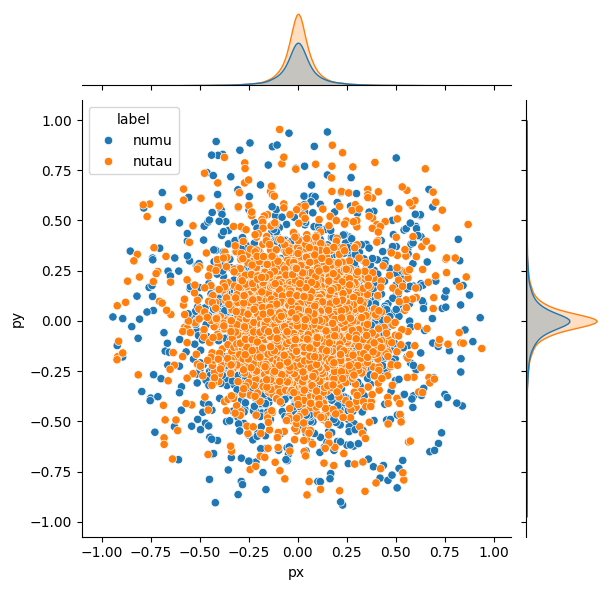

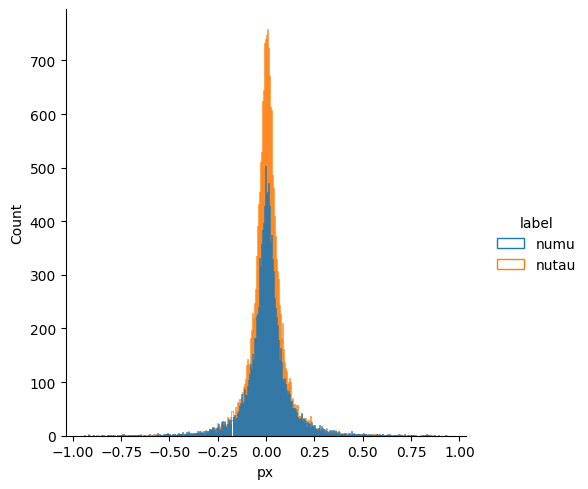

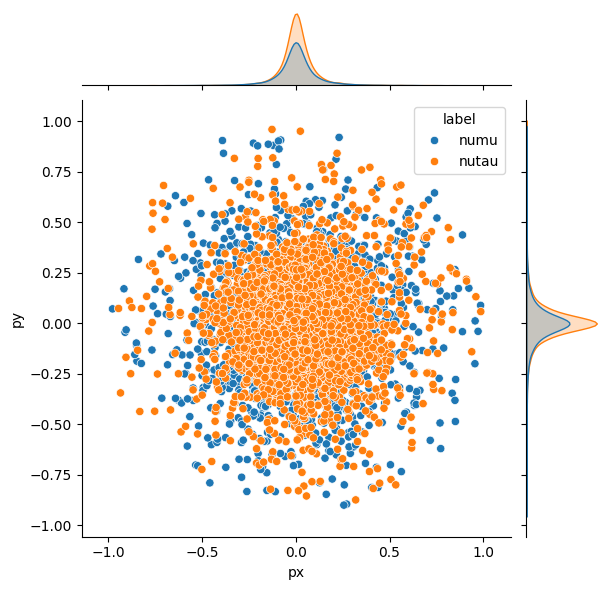

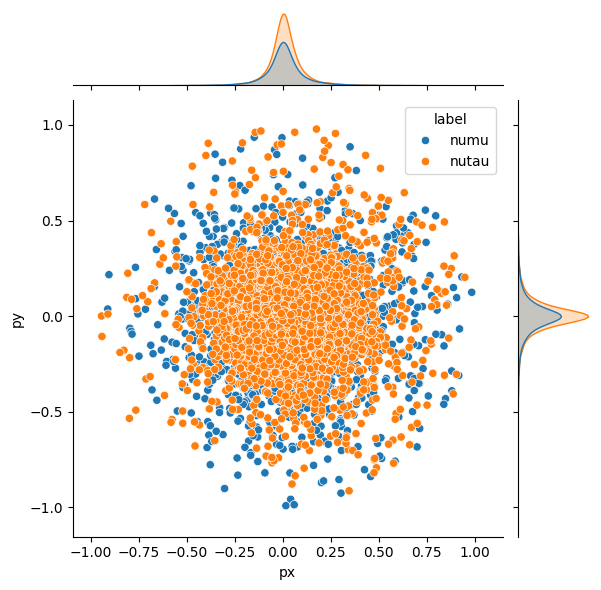

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_density(df, label="label", params=[], height=6, dpi=100):
    # Create the jointplot with a specified height
    g = sns.jointplot(data=df, x=params[0], y=params[1], hue=label, height=height)

    # Adjust the DPI (resolution) of the jointplot
    g.fig.set_dpi(dpi)
    
    # Show the plot
    plt.show()

def plot_1d_density(df, label = "lagel", param = "px"):
    sns.displot(df, x=param, hue = label, kind="hist", fill = False)

# Example usage:
# plot_joint_density(df, label="label", params=["param1", "param2"], height=8, dpi=150)



plot_density(Data.query("id == 13 & plane == 0"), label = "label", params = ["px", "py"])
plot_1d_density(Data.query("id == 13 & plane == 0"), label = "label", param = "px")
plot_density(Data.query("id == 13 & plane == 1"), label = "label", params = ["px", "py"])
plot_density(Data.query("id == 13 & plane == 2"), label = "label", params = ["px", "py"])

In [145]:
pd.set_option('display.max_rows', 129)
Data.query("label == 'numu'").query("id == 13 & plane == 0")

,Event,plane,id,Ekin_in,x,y,z,px,py,pz,Ekin_post,label
0,0,0.0,13.0,32.52210,-0.279207,-0.123482,3.0,-0.092088,-0.040400,0.994931,32.377155,numu
176,1,0.0,13.0,42.75580,-0.159265,0.010324,3.0,-0.052828,0.003402,0.998598,42.613855,numu
277,2,0.0,13.0,19.67210,-0.071971,-0.031295,3.0,-0.023967,-0.010185,0.999661,19.513981,numu
384,3,0.0,13.0,29.92350,-0.194316,-0.330746,3.0,-0.064004,-0.109554,0.991918,29.721529,numu
547,4,0.0,13.0,7.64791,-0.695241,0.568048,3.0,-0.221658,0.180600,0.958254,7.501847,numu
...,...,...,...,...,...,...,...,...,...,...,...,...
1553021,12795,0.0,13.0,16.14170,-0.272157,0.477490,3.0,-0.089171,0.156515,0.983642,15.991774,numu
1553160,12796,0.0,13.0,13.66370,-0.082834,-0.212254,3.0,-0.026292,-0.070586,0.997159,13.516495,numu
1553225,12797,0.0,13.0,2.86910,0.792561,0.094653,3.0,0.251995,0.030829,0.967237,2.721713,numu
1553452,12798,0.0,13.0,23.69500,-0.065445,-0.183210,3.0,-0.021446,-0.060561,0.997934,23.553424,numu


In [85]:
ev = Data.query("label == 'numu' & id == 13 & Event == 0")
ev["P"] = np.sqrt(ev["px"]**2 + ev["py"]**2 + ev["pz"]**2)
ev

/var/folders/9y/jxzgvgmd0p97vkzh_m18rqb80000gn/T/ipykernel_57016/2265326150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev["P"] = np.sqrt(ev["px"]**2 + ev["py"]**2 + ev["pz"]**2)


,Event,plane,id,Ekin_in,x,y,z,px,py,pz,Ekin_post,label,P
0,0,0,13,32.5221,-0.464057,-0.204968,5.0,-0.092080,-0.040688,0.994920,32.351391,numu,1.0
1,0,1,13,32.5221,-1.107233,-0.496127,12.0,-0.091183,-0.042375,0.994932,32.290249,numu,1.0
2,0,2,13,32.5221,-1.748553,-0.791580,19.0,-0.091364,-0.041264,0.994962,32.194947,numu,1.0
3,0,3,13,32.5221,-2.384297,-1.081866,26.0,-0.089730,-0.041213,0.995113,32.122953,numu,1.0
4,0,4,13,32.5221,-3.009411,-1.368581,33.0,-0.088135,-0.039896,0.995309,32.052649,numu,1.0
5,0,5,13,32.5221,-3.626195,-1.648088,40.0,-0.087021,-0.039717,0.995414,31.993337,numu,1.0
6,0,6,13,32.5221,-4.234185,-1.930154,47.0,-0.086423,-0.040320,0.995442,31.932289,numu,1.0
7,0,7,13,32.5221,-4.838756,-2.211703,54.0,-0.085709,-0.039434,0.995540,31.858816,numu,1.0
8,0,8,13,32.5221,-5.436187,-2.490048,61.0,-0.084123,-0.039498,0.995672,31.788539,numu,1.0
9,0,9,13,32.5221,-6.022104,-2.765423,68.0,-0.081981,-0.038971,0.995872,31.687170,numu,1.0


In [145]:
def calc_IP(Data):
    def reco_entry_point(data):
        points = data[["x", "y", "z"]].values
        X = points[:, 0]
        Y = points[:, 1]
        Z = points[:, 2].reshape(-1, 1)    
        # Fit a line to the points using linear regression
        reg = LinearRegression().fit(Z, np.vstack((X, Y)).T)
        # Define the range of X for plotting
        z_range = np.linspace(0, Z.max(), 100)
        
        # Predict the Y and Z values for the fitted line
        x_range, y_range = reg.predict(z_range.reshape(-1, 1)).T
        # data["x_0"] = x_range[0]
        # data["y_0"] = y_range[0]
        # print(data["label"].iloc[0][0])
        # return pd.DataFrame({"IP": [np.array(x_range[0]**2 + y_range[0]**2)], "label": [data["label"].iloc[0][0]})
        #print(data)
        label_out = data["label"].iloc[0]
        data_0 = data.drop(columns = ["label"])
        data_0 = data_0.groupby("Event").mean().reset_index().drop(columns = ["Event"])
        # print(data_0.iloc[0].squeeze(axis=0).to_list())
        return pd.Series([data["label"].iloc[0]] + data_0.iloc[0].squeeze(axis=0).to_list() + [np.sqrt(x_range[0]**2 + y_range[0]**2)])

    Data_0 = Data.loc[(Data["id"] == 13) & (Data["plane"].isin([2,3,4,5]))]
    Data_0 = Data_0.groupby("Event").apply(reco_entry_point)
    return Data_0

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [10]:
out_IP = calc_IP(Data)
inter_list = list(Data.columns)[:]
inter_list.remove("Event")
inter_list.remove("label")
out_IP.columns = ["label"] + inter_list + ["IP"]
out_IP

/var/folders/9y/jxzgvgmd0p97vkzh_m18rqb80000gn/T/ipykernel_32869/3296062751.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Data_0 = Data_0.groupby("Event").apply(reco_entry_point)


,label,plane,id,Ekin_in,x,y,z,px,py,pz,Ekin_post,IP
Event,,,,,,,,,,,,
0,numu,1.0,13.0,32.52210,-0.739044,-0.325093,8.0,-0.091286,-0.040071,0.995018,32.339856,0.005410
1,numu,1.0,13.0,42.75580,-0.419956,0.027483,8.0,-0.051919,0.003500,0.998645,42.575042,0.003928
2,numu,1.0,13.0,19.67210,-0.183303,-0.081952,8.0,-0.021733,-0.010057,0.999712,19.477304,0.008799
3,numu,1.0,13.0,29.92350,-0.511746,-0.882452,8.0,-0.062545,-0.109335,0.992035,29.683517,0.005923
4,numu,1.0,13.0,7.64791,-1.829142,1.505734,8.0,-0.218301,0.179208,0.959280,7.362557,0.022090
...,...,...,...,...,...,...,...,...,...,...,...,...
31418,nutau,1.0,13.0,102.20800,-0.419882,-0.426913,8.0,-0.054167,-0.053092,0.997119,13.722772,0.014957
31419,nutau,1.0,13.0,42.70790,0.399258,-0.727584,8.0,0.050113,-0.090264,0.994655,21.409692,0.003322
31420,nutau,1.0,13.0,23.56840,0.664128,-2.265073,8.0,0.089018,-0.274702,0.957346,3.450259,0.072307


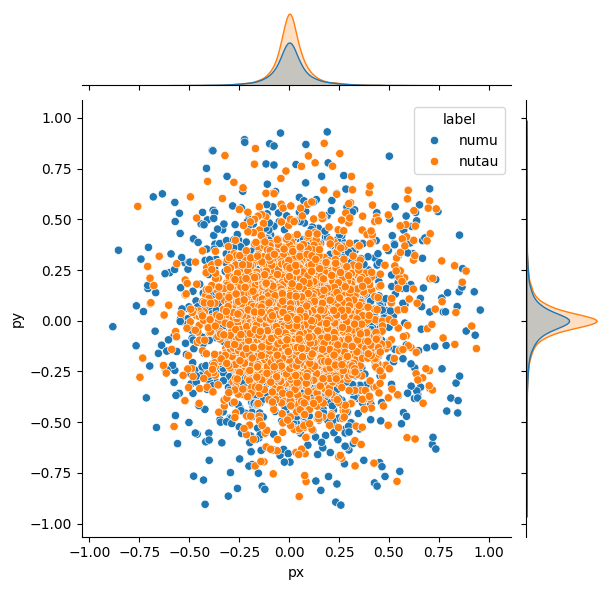

In [20]:
plot_density(out_IP, label = "label", params = ["px", "py"], plot_type="0")

In [146]:
out_IP_mu = calc_IP(Data_0["mu"])
inter_list = list(Data_0["mu"].columns)[:]
inter_list.remove("Event")
inter_list.remove("label")
out_IP_mu.columns = ["label"] + inter_list + ["IP"]
out_IP_tau = calc_IP(Data_0["tau"])
inter_list = list(Data_0["tau"].columns)[:]
inter_list.remove("Event")
inter_list.remove("label")
out_IP_tau.columns = ["label"] + inter_list + ["IP"]
min_len = min(len(out_IP_mu), len(out_IP_tau))
out_IP_mu = out_IP_mu.iloc[:min_len]
out_IP_tau = out_IP_tau.iloc[:min_len]

def conv_IP(df):
    out_IP_output = df.reset_index()
    out_IP_output["px"] *= out_IP_output["Ekin_post"]
    out_IP_output["py"] *= out_IP_output["Ekin_post"]
    out_IP_output["pz"] *= out_IP_output["Ekin_post"]
    out_IP_output["E_mu_IP"] = out_IP_output["Ekin_post"]
    out_IP_output["px_mu_IP"] = out_IP_output["px"]
    out_IP_output["py_mu_IP"] = out_IP_output["py"]
    out_IP_output["pz_mu_IP"] = out_IP_output["pz"]
    return out_IP_output

out_IP_numu = conv_IP(out_IP_mu)
out_IP_nutau = conv_IP(out_IP_tau)


out_IP_numu["Event_mu_IP"] = out_IP_numu["Event"]
out_IP_nutau["Event_mu_IP"] = out_IP_nutau["Event"]
out_IP_numu[["Event_mu_IP", "E_mu_IP", "px_mu_IP", "py_mu_IP", "pz_mu_IP", "IP"]].to_csv("../data/out_IP_mu_3cm_2345planes.csv")
out_IP_nutau[["Event_mu_IP", "E_mu_IP", "px_mu_IP", "py_mu_IP", "pz_mu_IP", "IP"]].to_csv("../data/out_IP_tau_3cm_2345planes.csv")

/var/folders/9y/jxzgvgmd0p97vkzh_m18rqb80000gn/T/ipykernel_32869/272728124.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Data_0 = Data_0.groupby("Event").apply(reco_entry_point)
/var/folders/9y/jxzgvgmd0p97vkzh_m18rqb80000gn/T/ipykernel_32869/272728124.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Data_0 = Data_0.groupby("Event").apply(reco_entry_point)


In [81]:
out_IP_numu

,Event,label,plane,id,Ekin_in,x,y,z,px,py,pz,Ekin_post,IP,E_mu_IP,px_mu_IP,py_mu_IP,pz_mu_IP,Event_mu_IP
0,0,numu,1.0,13.0,32.52210,-0.739044,-0.325093,8.0,-2.952162,-1.295885,32.178738,32.339856,0.005410,32.339856,-2.952162,-1.295885,32.178738,0
1,1,numu,1.0,13.0,42.75580,-0.419956,0.027483,8.0,-2.210471,0.149033,42.517348,42.575042,0.003928,42.575042,-2.210471,0.149033,42.517348,1
2,2,numu,1.0,13.0,19.67210,-0.183303,-0.081952,8.0,-0.423303,-0.195891,19.471686,19.477304,0.008799,19.477304,-0.423303,-0.195891,19.471686,2
3,3,numu,1.0,13.0,29.92350,-0.511746,-0.882452,8.0,-1.856559,-3.245440,29.447076,29.683517,0.005923,29.683517,-1.856559,-3.245440,29.447076,3
4,4,numu,1.0,13.0,7.64791,-1.829142,1.505734,8.0,-1.607252,1.319431,7.062754,7.362557,0.022090,7.362557,-1.607252,1.319431,7.062754,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12739,12795,numu,1.0,13.0,16.14170,-0.716968,1.271398,8.0,-1.389929,2.482451,15.651607,15.908105,0.007400,15.908105,-1.389929,2.482451,15.651607,12795
12740,12796,numu,1.0,13.0,13.66370,-0.210265,-0.568918,8.0,-0.340080,-0.965410,13.431033,13.469993,0.007850,13.469993,-0.340080,-0.965410,13.431033,12796
12741,12797,numu,1.0,13.0,2.86910,2.147478,0.248729,8.0,0.706527,0.084628,2.569975,2.666871,0.037997,2.666871,0.706527,0.084628,2.569975,12797
12742,12798,numu,1.0,13.0,23.69500,-0.166707,-0.491397,8.0,-0.467544,-1.451856,23.458822,23.508381,0.007568,23.508381,-0.467544,-1.451856,23.458822,12798


In [82]:
out_IP_nutau

,Event,label,plane,id,Ekin_in,x,y,z,px,py,pz,Ekin_post,IP,E_mu_IP,px_mu_IP,py_mu_IP,pz_mu_IP,Event_mu_IP
0,0,nutau,1.0,13.0,59.3047,0.108267,0.207606,8.0,0.511391,0.899635,37.171671,37.186079,0.014129,37.186079,0.511391,0.899635,37.171671,0
1,1,nutau,1.0,13.0,34.0972,0.694691,-0.285996,8.0,0.628200,-0.270050,7.390818,7.422416,0.007359,7.422416,0.628200,-0.270050,7.390818,1
2,2,nutau,1.0,13.0,78.3003,0.300005,-0.047962,8.0,1.495643,-0.238250,39.402629,39.431733,0.003291,39.431733,1.495643,-0.238250,39.402629,2
3,3,nutau,1.0,13.0,66.2591,0.090784,0.082633,8.0,0.470359,0.393144,37.846941,37.851917,0.008801,37.851917,0.470359,0.393144,37.846941,3
4,4,nutau,1.0,13.0,12.5897,-0.655288,-2.761450,8.0,-0.289960,-1.292103,3.728047,3.956340,0.027488,3.956340,-0.289960,-1.292103,3.728047,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12739,12770,nutau,1.0,13.0,37.7970,0.177823,0.393460,8.0,0.474936,0.969955,19.706749,19.736341,0.014515,19.736341,0.474936,0.969955,19.706749,12770
12740,12771,nutau,1.0,13.0,70.3978,-0.015929,-0.312783,8.0,-0.022367,-0.601501,15.225883,15.237795,0.007597,15.237795,-0.022367,-0.601501,15.225883,12771
12741,12772,nutau,1.0,13.0,52.6234,-0.176806,0.024382,8.0,-0.286242,0.008719,14.549475,14.552340,0.023901,14.552340,-0.286242,0.008719,14.549475,12772
12742,12773,nutau,1.0,13.0,71.7733,0.096110,0.151000,8.0,0.325798,0.439505,24.387621,24.393790,0.013052,24.393790,0.325798,0.439505,24.387621,12773


In [21]:
out_IP_output = out_IP.reset_index()
out_IP_output["px"] *= out_IP_output["Ekin_post"]
out_IP_output["py"] *= out_IP_output["Ekin_post"]
out_IP_output["pz"] *= out_IP_output["Ekin_post"]
out_IP_output["E_mu_IP"] = out_IP_output["Ekin_post"]
out_IP_output["px_mu_IP"] = out_IP_output["px"]
out_IP_output["py_mu_IP"] = out_IP_output["py"]
out_IP_output["pz_mu_IP"] = out_IP_output["pz"]
# out_IP_output_nutau = out_IP_output.query("label == 'nutau'").reset_index().drop(columns = ["index", "Event"]).reset_index().rename(columns={"index": "Event"})

# event_numu = list(out_IP_output_nutau["Event"])
# out_IP_output_numu = out_IP_output.query("label == 'numu'").iloc[:event_numu[-1]+1]

out_IP_output_numu = out_IP_output.query("label == 'numu'").reset_index().drop(columns = ["index", "Event"]).reset_index().rename(columns={"index": "Event"})

event_nutau = list(out_IP_output_numu["Event"])
out_IP_output_nutau = out_IP_output.query("label == 'nutau'").iloc[:event_nutau[-1]+1]

In [150]:
out_IP_output_numu["Event_mu_IP"] = out_IP_output_numu["Event"]
out_IP_output_nutau["Event_mu_IP"] = out_IP_output_nutau["Event"]
out_IP_output_numu[["Event_mu_IP", "E_mu_IP", "px_mu_IP", "py_mu_IP", "pz_mu_IP", "IP"]].to_csv("../data/out_IP_mu_3cm.csv")
out_IP_output_nutau[["Event_mu_IP", "E_mu_IP", "px_mu_IP", "py_mu_IP", "pz_mu_IP", "IP"]].to_csv("../data/out_IP_tau_3cm.csv")

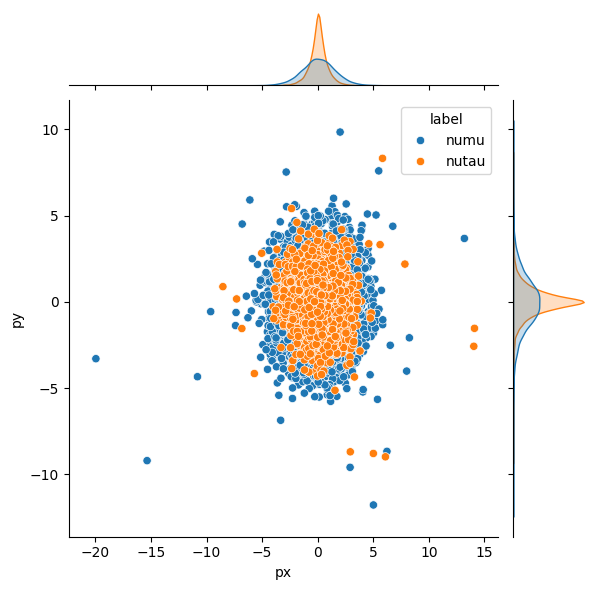

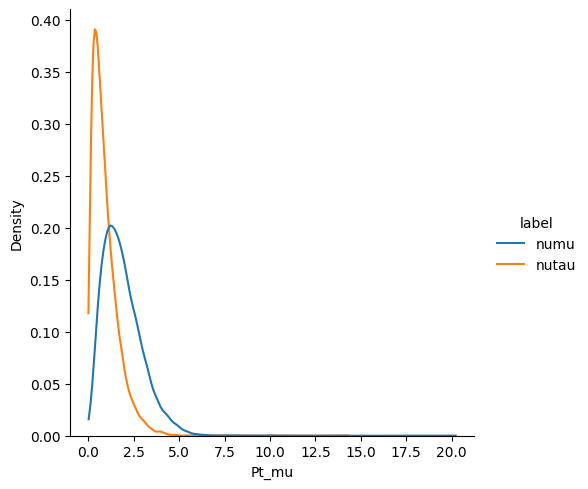

In [35]:
plot_density(pd.concat([out_IP_output_numu, out_IP_output_nutau]), label = "label", params = ["px", "py"])

df_out = pd.concat([out_IP_output_numu, out_IP_output_nutau])
df_out["Pt_mu"] = np.sqrt(df_out["px"]**2 + df_out["py"]**2)
plot_1d_density(df_out, label = "label", param = "Pt_mu")

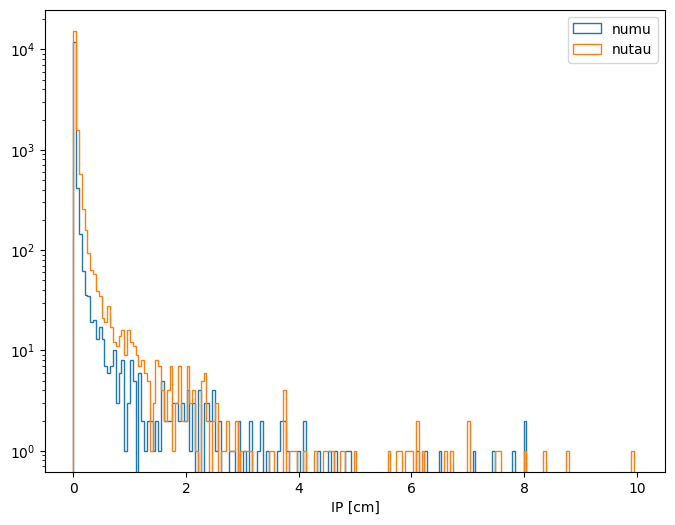

In [139]:
fig, ax = plt.subplots(figsize = (8,6), dpi = 100)
bins = np.linspace(0, 10, 200)
ax.hist(out_IP.query("label == 'numu'")["IP"].iloc[:len(out_IP.query("label == 'nutau'")["IP"])], histtype = "step", bins = bins, label = f"numu")
ax.hist(out_IP.query("label == 'nutau'")["IP"], histtype = "step", bins = bins, label = f"nutau")
ax.set_xlabel("IP [cm]")
ax.set_yscale("log")
ax.legend()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12,6))
bins = np.linspace(.1, 7., 100)
IP_mu = out_IP.query("label == 'numu'")["IP"].mean()
IP_tau = out_IP.query("label == 'nutau'")["IP"].mean()
ax[0].hist(out_IP.query("label == 'numu'")["IP"], histtype = "step", density = True, bins = bins, label = f"Mean IP = {IP_mu:.2f}")
ax[1].hist(out_IP.query("label == 'nutau'")["IP"], histtype = "step", density = True, bins = bins, label = f"Mean IP = {IP_tau:.2f}")
ax[0].set_xlabel("IP [cm]")
ax[1].set_xlabel("IP [cm]")
ax[0].set_title("numu")
ax[1].set_title("nutau")
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend()
ax[1].legend()

In [32]:
out_IP["label"][0].values

array([0     numu
       1     numu
       2     numu
       0    nutau
       1    nutau
       2    nutau
       Name: label, dtype: object], dtype=object)

In [9]:
z_ev = Data.query("id == 13 & Event == 0")["z"]
x_ev = Data.query("id == 13 & Event == 0")["x"]
y_ev = Data.query("id == 13 & Event == 0")["y"]

Text(0, 0.5, 'y [cm]')

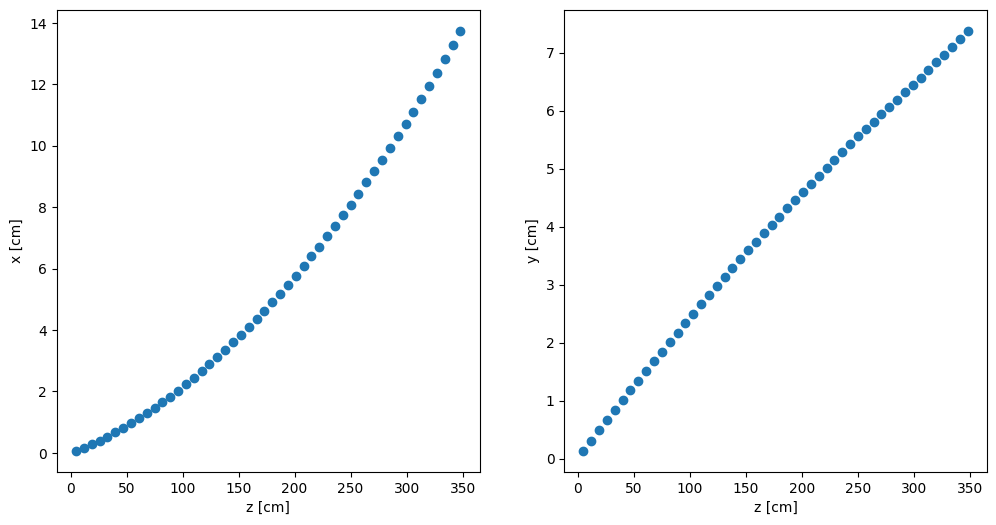

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (12,6))
ax[0].scatter(z_ev, x_ev)
ax[1].scatter(z_ev, y_ev)
ax[0].set_xlabel("z [cm]")
ax[1].set_xlabel("z [cm]")
ax[0].set_ylabel("x [cm]")
ax[1].set_ylabel("y [cm]")


Using matplotlib backend: module://matplotlib_inline.backend_inline
-0.003923979633333352 -0.00018528938866665956 1.5431948320367412e-05


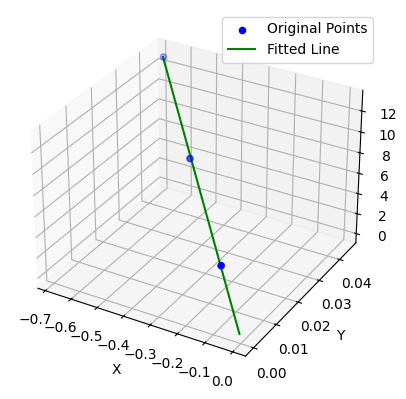

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
%matplotlib
points = Data.loc[(Data["id"] == 13) & (Data["plane"].isin([0,1,2])) & (Data["Event"] == 1)][["x", "y", "z"]].values
# Define the 3D points
# points = np.array([
#     [x1, y1, z1],
#     [x2, y2, z2],
#     [x3, y3, z3]
# ])

# Extract X, Y, Z coordinates
X = points[:, 0]
Y = points[:, 1]
Z = points[:, 2].reshape(-1, 1)

# Fit a line to the points using linear regression
reg = LinearRegression().fit(Z, np.vstack((X, Y)).T)

# Define the range of X for plotting
z_range = np.linspace(0, Z.max(), 100)

# Predict the Y and Z values for the fitted line
x_range, y_range = reg.predict(z_range.reshape(-1, 1)).T


print(x_range[0], y_range[0], np.array(x_range[0]**2 + y_range[0]**2))
# Extrapolate the line to the origin (0,0,0)
t = -points[2] / np.linalg.norm(points[2])  # parameter to reach origin
extrapolated_point = points[2] + t * (0 - points[2])

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the original points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='blue', label='Original Points')

# Plot the fitted line
ax.plot(x_range, y_range, z_range, color='green', label='Fitted Line')

# # Plot the extrapolated line
# ax.plot([points[0, 0], extrapolated_point[0]], 
#         [points[0, 1], extrapolated_point[1]], 
#         [points[0, 2], extrapolated_point[2]], 
#         color='red', label='Extrapolated Line to (0,0,0)')

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()


In [45]:
x_range, y_range, z_range

(array([-0.00494334,  0.02169179,  0.04832691,  0.07496203,  0.10159716,
         0.12823228,  0.15486741,  0.18150253,  0.20813765,  0.23477278,
         0.2614079 ,  0.28804303,  0.31467815,  0.34131327,  0.3679484 ,
         0.39458352,  0.42121865,  0.44785377,  0.47448889,  0.50112402,
         0.52775914,  0.55439427,  0.58102939,  0.60766451,  0.63429964,
         0.66093476,  0.68756989,  0.71420501,  0.74084014,  0.76747526,
         0.79411038,  0.82074551,  0.84738063,  0.87401576,  0.90065088,
         0.927286  ,  0.95392113,  0.98055625,  1.00719138,  1.0338265 ,
         1.06046162,  1.08709675,  1.11373187,  1.140367  ,  1.16700212,
         1.19363724,  1.22027237,  1.24690749,  1.27354262,  1.30017774,
         1.32681286,  1.35344799,  1.38008311,  1.40671824,  1.43335336,
         1.45998848,  1.48662361,  1.51325873,  1.53989386,  1.56652898,
         1.5931641 ,  1.61979923,  1.64643435,  1.67306948,  1.6997046 ,
         1.72633972,  1.75297485,  1.77960997,  1.8

In [122]:
out_IP_output_numu

,Event,label,plane,id,Ekin_in,x,y,z,px,py,pz,Ekin_post,IP,E_mu_IP,px_mu_IP,py_mu_IP,pz_mu_IP,Event_mu_IP
0,0,numu,1.0,13.0,32.52210,-1.106614,-0.497558,12.0,-2.954879,-1.337713,32.115471,32.278862,0.007690,32.278862,-2.954879,-1.337713,32.115471,0
1,1,numu,1.0,13.0,42.75580,-0.635207,0.044122,12.0,-2.227778,0.159745,42.361633,42.420481,0.003252,42.420481,-2.227778,0.159745,42.361633,1
2,2,numu,1.0,13.0,19.67210,-0.273165,-0.125439,12.0,-0.411388,-0.193455,19.421075,19.426444,0.016528,19.426444,-0.411388,-0.193455,19.421075,2
3,3,numu,1.0,13.0,29.92350,-0.760486,-1.338754,12.0,-1.828737,-3.291356,29.404126,29.644254,0.013362,29.644254,-1.828737,-3.291356,29.404126,3
4,4,numu,1.0,13.0,7.64791,-2.747112,2.260449,12.0,-1.596899,1.333977,7.097023,7.395847,0.039808,7.395847,-1.596899,1.333977,7.097023,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19118,21580,numu,1.0,13.0,37.58100,0.155529,0.268127,12.0,0.500759,0.826284,37.306476,37.318999,0.004489,37.318999,0.500759,0.826284,37.306476,21580
19119,21581,numu,1.0,13.0,35.11430,1.003790,-0.359592,12.0,2.917897,-1.049716,34.730137,34.868313,0.005285,34.868313,2.917897,-1.049716,34.730137,21581
19120,21582,numu,1.0,13.0,8.00773,-0.938538,-1.182441,12.0,-0.595894,-0.753606,7.713570,7.773198,0.013392,7.773198,-0.595894,-0.753606,7.713570,21582
19121,21583,numu,1.0,13.0,19.95620,0.267559,0.674762,12.0,0.452006,1.117309,19.631527,19.668534,0.013157,19.668534,0.452006,1.117309,19.631527,21583
